In [1]:
import pandas as pd
import numpy as np

In [2]:
df_intial = pd.read_csv("/kaggle/input/integrated-otpim-data/modified_chemical_measurements.csv")

df_intial.head()

,HEATID,POSITIONROW,DATETIME,VALC,VALSI,VALMN,VALP,VALS,VALCU,VALCR,VALMO,VALNI
0,6F0020,1,2016-01-01 19:59:00,0.2312,0.2449,1.2652,0.0076,0.0147,0.2072,0.0726,0.0194,0.1323
1,6F0021,1,2016-01-01 20:59:00,0.2507,0.2687,1.2916,0.0055,0.0204,0.2045,0.0747,0.0206,0.1326
2,6F0022,1,2016-01-01 21:53:00,0.2340,0.2276,1.1963,0.0056,0.0193,0.1898,0.0695,0.0203,0.1218
3,6F0023,1,2016-01-01 23:27:00,0.3652,0.2154,0.7934,0.0078,0.0250,0.2154,0.0956,0.0342,0.2051
4,6F0024,1,2016-01-02 00:32:00,0.3740,0.1932,0.7948,0.0071,0.0202,0.2191,0.1029,0.0267,0.1534


In [3]:
df_intial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20827 entries, 0 to 20826
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HEATID       20827 non-null  object 
 1   POSITIONROW  20827 non-null  int64  
 2   DATETIME     20827 non-null  object 
 3   VALC         20827 non-null  float64
 4   VALSI        20827 non-null  float64
 5   VALMN        20827 non-null  float64
 6   VALP         20827 non-null  float64
 7   VALS         20827 non-null  float64
 8   VALCU        20827 non-null  float64
 9   VALCR        20827 non-null  float64
 10  VALMO        20827 non-null  float64
 11  VALNI        20827 non-null  float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1.9+ MB


In [4]:
df_electric = pd.read_csv("/kaggle/input/integrated-otpim-data/modified_transformer.csv")
df_electric.head()

,TAP,HEATID,STARTTIME,DURATION,MW
0,11,6F0020,2016-01-01 18:35:00,00: 29,0.50
1,17,6F0020,2016-01-01 19:04:00,10: 40,16.00
2,17,6F0020,2016-01-01 18:55:00,03: 00,11.00
3,17,6F0020,2016-01-01 18:37:00,13: 20,16.75
4,17,6F0020,2016-01-01 18:36:00,00: 40,0.75


In [5]:
df_electric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271712 entries, 0 to 271711
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   TAP        271712 non-null  int64  
 1   HEATID     271712 non-null  object 
 2   STARTTIME  271712 non-null  object 
 3   DURATION   271712 non-null  object 
 4   MW         271712 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 10.4+ MB


In [6]:
df_temp = pd.read_csv("/kaggle/input/integrated-otpim-data/modified_temp1.csv")
df_temp.head()

,HEATID,DATETIME,TEMP,VALO2_PPM
0,6F0020,2016-01-01 19:15:00,1650.0,1242.0
1,6F0021,2016-01-01 20:05:00,1649.0,1160.0
2,6F0021,2016-01-01 20:05:00,1649.0,1160.0
3,6F0021,2016-01-01 20:03:00,1606.0,1152.0
4,6F0022,2016-01-01 21:03:00,1636.0,947.0


In [7]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85104 entries, 0 to 85103
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   HEATID     85104 non-null  object 
 1   DATETIME   85104 non-null  object 
 2   TEMP       85104 non-null  float64
 3   VALO2_PPM  85104 non-null  float64
dtypes: float64(2), object(2)
memory usage: 2.6+ MB


> **REMOVING UNECESSARY COLS**




**merging databases**

In [8]:
merged_data = df_intial.merge(df_electric, on="HEATID", how="outer")
merged_data = merged_data.merge(df_temp, on=["HEATID", "DATETIME"], how="outer")
merged_data.head()

,HEATID,POSITIONROW,DATETIME,VALC,VALSI,VALMN,VALP,VALS,VALCU,VALCR,VALMO,VALNI,TAP,STARTTIME,DURATION,MW,TEMP,VALO2_PPM
0,5F0002,NaN,2015-01-01 01:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1598.0,366.0
1,5F0002,NaN,2015-01-01 01:31:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1633.0,380.0
2,5F0002,NaN,2015-01-01 01:32:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1650.0,403.0
3,5F0002,1.0,2015-01-01 03:10:00,0.1457,0.276,0.5306,0.1457,0.0167,0.1998,0.524,0.276,0.1201,14.0,2015-01-01 01:12:00,00: 10,0.125,NaN,NaN
4,5F0002,1.0,2015-01-01 03:10:00,0.1457,0.276,0.5306,0.1457,0.0167,0.1998,0.524,0.276,0.1201,15.0,2015-01-01 00:56:00,12: 00,16.500,NaN,NaN


In [9]:
df_final = merged_data

In [10]:
df_final

,HEATID,POSITIONROW,DATETIME,VALC,VALSI,VALMN,VALP,VALS,VALCU,VALCR,VALMO,VALNI,TAP,STARTTIME,DURATION,MW,TEMP,VALO2_PPM
0,5F0002,NaN,2015-01-01 01:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1598.0,366.0
1,5F0002,NaN,2015-01-01 01:31:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1633.0,380.0
2,5F0002,NaN,2015-01-01 01:32:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1650.0,403.0
3,5F0002,1.0,2015-01-01 03:10:00,0.1457,0.276,0.5306,0.1457,0.0167,0.1998,0.5240,0.2760,0.1201,14.0,2015-01-01 01:12:00,00: 10,0.125,NaN,NaN
4,5F0002,1.0,2015-01-01 03:10:00,0.1457,0.276,0.5306,0.1457,0.0167,0.1998,0.5240,0.2760,0.1201,15.0,2015-01-01 00:56:00,12: 00,16.500,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356825,8F5473,NaN,2018-07-29 09:16:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1656.0,947.0
356826,8F5473,1.0,2018-07-30 10:32:00,0.1239,0.182,0.4102,0.0076,0.0063,0.1026,0.7973,0.2386,0.1107,15.0,2018-07-29 08:37:00,10: 11,14.000,NaN,NaN
356827,8F5473,1.0,2018-07-30 10:32:00,0.1239,0.182,0.4102,0.0076,0.0063,0.1026,0.7973,0.2386,0.1107,15.0,2018-07-29 08:51:00,23: 00,33.500,NaN,NaN
356828,8F5473,1.0,2018-07-30 10:32:00,0.1239,0.182,0.4102,0.0076,0.0063,0.1026,0.7973,0.2386,0.1107,13.0,2018-07-29 08:47:00,01: 10,2.000,NaN,NaN


In [11]:
df_final.isnull().sum()

HEATID              0
POSITIONROW     85104
DATETIME            0
VALC            85104
VALSI           85104
VALMN           85104
VALP            85104
VALS            85104
VALCU           85104
VALCR           85104
VALMO           85104
VALNI           85104
TAP             85118
STARTTIME       85118
DURATION        85118
MW              85118
TEMP           271726
VALO2_PPM      271726
dtype: int64

In [12]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356830 entries, 0 to 356829
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   HEATID       356830 non-null  object 
 1   POSITIONROW  271726 non-null  float64
 2   DATETIME     356830 non-null  object 
 3   VALC         271726 non-null  float64
 4   VALSI        271726 non-null  float64
 5   VALMN        271726 non-null  float64
 6   VALP         271726 non-null  float64
 7   VALS         271726 non-null  float64
 8   VALCU        271726 non-null  float64
 9   VALCR        271726 non-null  float64
 10  VALMO        271726 non-null  float64
 11  VALNI        271726 non-null  float64
 12  TAP          271712 non-null  float64
 13  STARTTIME    271712 non-null  object 
 14  DURATION     271712 non-null  object 
 15  MW           271712 non-null  float64
 16  TEMP         85104 non-null   float64
 17  VALO2_PPM    85104 non-null   float64
dtypes: float64(14), object(4

In [13]:
cols_remove = ["HEATID"]

df_final = df_final.drop(cols_remove, axis=1)
df_final

,POSITIONROW,DATETIME,VALC,VALSI,VALMN,VALP,VALS,VALCU,VALCR,VALMO,VALNI,TAP,STARTTIME,DURATION,MW,TEMP,VALO2_PPM
0,NaN,2015-01-01 01:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1598.0,366.0
1,NaN,2015-01-01 01:31:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1633.0,380.0
2,NaN,2015-01-01 01:32:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1650.0,403.0
3,1.0,2015-01-01 03:10:00,0.1457,0.276,0.5306,0.1457,0.0167,0.1998,0.5240,0.2760,0.1201,14.0,2015-01-01 01:12:00,00: 10,0.125,NaN,NaN
4,1.0,2015-01-01 03:10:00,0.1457,0.276,0.5306,0.1457,0.0167,0.1998,0.5240,0.2760,0.1201,15.0,2015-01-01 00:56:00,12: 00,16.500,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356825,NaN,2018-07-29 09:16:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1656.0,947.0
356826,1.0,2018-07-30 10:32:00,0.1239,0.182,0.4102,0.0076,0.0063,0.1026,0.7973,0.2386,0.1107,15.0,2018-07-29 08:37:00,10: 11,14.000,NaN,NaN
356827,1.0,2018-07-30 10:32:00,0.1239,0.182,0.4102,0.0076,0.0063,0.1026,0.7973,0.2386,0.1107,15.0,2018-07-29 08:51:00,23: 00,33.500,NaN,NaN
356828,1.0,2018-07-30 10:32:00,0.1239,0.182,0.4102,0.0076,0.0063,0.1026,0.7973,0.2386,0.1107,13.0,2018-07-29 08:47:00,01: 10,2.000,NaN,NaN


In [14]:
df_final["DATETIME"] = pd.to_datetime(df_final["DATETIME"])
df_final["YEAR"] = df_final["DATETIME"].dt.year.astype(np.float32)
df_final["MONTH"] = df_final["DATETIME"].dt.month.astype(np.float32)
df_final["HOUR"] = df_final["DATETIME"].dt.hour.astype(np.float32)
df_final["MINUTES"]  = df_final["DATETIME"].dt.minute.astype(np.float32)
df_final["SECONDS"]  = df_final["DATETIME"].dt.second.astype(np.float32)

In [15]:
df_final.isnull().sum()

POSITIONROW     85104
DATETIME            0
VALC            85104
VALSI           85104
VALMN           85104
VALP            85104
VALS            85104
VALCU           85104
VALCR           85104
VALMO           85104
VALNI           85104
TAP             85118
STARTTIME       85118
DURATION        85118
MW              85118
TEMP           271726
VALO2_PPM      271726
YEAR                0
MONTH               0
HOUR                0
MINUTES             0
SECONDS             0
dtype: int64

In [16]:
columns=["VALO2_PPM", "TEMP", "MW", "DURATION", "STARTTIME", "TAP", "VALNI", "VALMO", "VALCR", "VALCU", "VALS", "VALC", "VALP", "VALMN", "VALSI"]

In [17]:
df_numeric = df_final[columns]
df_numeric

,VALO2_PPM,TEMP,MW,DURATION,STARTTIME,TAP,VALNI,VALMO,VALCR,VALCU,VALS,VALC,VALP,VALMN,VALSI
0,366.0,1598.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,380.0,1633.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,403.0,1650.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,0.125,00: 10,2015-01-01 01:12:00,14.0,0.1201,0.2760,0.5240,0.1998,0.0167,0.1457,0.1457,0.5306,0.276
4,NaN,NaN,16.500,12: 00,2015-01-01 00:56:00,15.0,0.1201,0.2760,0.5240,0.1998,0.0167,0.1457,0.1457,0.5306,0.276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356825,947.0,1656.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356826,NaN,NaN,14.000,10: 11,2018-07-29 08:37:00,15.0,0.1107,0.2386,0.7973,0.1026,0.0063,0.1239,0.0076,0.4102,0.182
356827,NaN,NaN,33.500,23: 00,2018-07-29 08:51:00,15.0,0.1107,0.2386,0.7973,0.1026,0.0063,0.1239,0.0076,0.4102,0.182
356828,NaN,NaN,2.000,01: 10,2018-07-29 08:47:00,13.0,0.1107,0.2386,0.7973,0.1026,0.0063,0.1239,0.0076,0.4102,0.182


In [18]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356830 entries, 0 to 356829
Data columns (total 22 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   POSITIONROW  271726 non-null  float64       
 1   DATETIME     356830 non-null  datetime64[ns]
 2   VALC         271726 non-null  float64       
 3   VALSI        271726 non-null  float64       
 4   VALMN        271726 non-null  float64       
 5   VALP         271726 non-null  float64       
 6   VALS         271726 non-null  float64       
 7   VALCU        271726 non-null  float64       
 8   VALCR        271726 non-null  float64       
 9   VALMO        271726 non-null  float64       
 10  VALNI        271726 non-null  float64       
 11  TAP          271712 non-null  float64       
 12  STARTTIME    271712 non-null  object        
 13  DURATION     271712 non-null  object        
 14  MW           271712 non-null  float64       
 15  TEMP         85104 non-null   floa

In [19]:
df_final["STARTTIME"] = pd.to_datetime(df_final["STARTTIME"])


In [20]:
df_final

,POSITIONROW,DATETIME,VALC,VALSI,VALMN,VALP,VALS,VALCU,VALCR,VALMO,...,STARTTIME,DURATION,MW,TEMP,VALO2_PPM,YEAR,MONTH,HOUR,MINUTES,SECONDS
0,NaN,2015-01-01 01:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,1598.0,366.0,2015.0,1.0,1.0,30.0,0.0
1,NaN,2015-01-01 01:31:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,1633.0,380.0,2015.0,1.0,1.0,31.0,0.0
2,NaN,2015-01-01 01:32:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,1650.0,403.0,2015.0,1.0,1.0,32.0,0.0
3,1.0,2015-01-01 03:10:00,0.1457,0.276,0.5306,0.1457,0.0167,0.1998,0.5240,0.2760,...,2015-01-01 01:12:00,00: 10,0.125,NaN,NaN,2015.0,1.0,3.0,10.0,0.0
4,1.0,2015-01-01 03:10:00,0.1457,0.276,0.5306,0.1457,0.0167,0.1998,0.5240,0.2760,...,2015-01-01 00:56:00,12: 00,16.500,NaN,NaN,2015.0,1.0,3.0,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356825,NaN,2018-07-29 09:16:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,1656.0,947.0,2018.0,7.0,9.0,16.0,0.0
356826,1.0,2018-07-30 10:32:00,0.1239,0.182,0.4102,0.0076,0.0063,0.1026,0.7973,0.2386,...,2018-07-29 08:37:00,10: 11,14.000,NaN,NaN,2018.0,7.0,10.0,32.0,0.0
356827,1.0,2018-07-30 10:32:00,0.1239,0.182,0.4102,0.0076,0.0063,0.1026,0.7973,0.2386,...,2018-07-29 08:51:00,23: 00,33.500,NaN,NaN,2018.0,7.0,10.0,32.0,0.0
356828,1.0,2018-07-30 10:32:00,0.1239,0.182,0.4102,0.0076,0.0063,0.1026,0.7973,0.2386,...,2018-07-29 08:47:00,01: 10,2.000,NaN,NaN,2018.0,7.0,10.0,32.0,0.0


In [21]:
df_final["VALC"] = df_final["VALC"].fillna(df_final["VALC"].median())
df_final["VALSI"] = df_final["VALSI"].fillna(df_final["VALSI"].median())
df_final["VALMN"] = df_final["VALMN"].fillna(df_final["VALMN"].median())
df_final["VALP"] = df_final["VALP"].fillna(df_final["VALP"].median())
df_final["VALS"] = df_final["VALS"].fillna(df_final["VALS"].median())
df_final["VALCU"] = df_final["VALCU"].fillna(df_final["VALCU"].median())
df_final["VALCR"] = df_final["VALCR"].fillna(df_final["VALCR"].median())
df_final["VALMO"] = df_final["VALMO"].fillna(df_final["VALMO"].median())
df_final["VALNI"] = df_final["VALNI"].fillna(df_final["VALNI"].median())
df_final["TAP"] = df_final["TAP"].fillna(df_final["TAP"].median())
df_final["TEMP"] = df_final["TEMP"].fillna(df_final["TEMP"].median())
df_final["VALO2_PPM"] = df_final["VALO2_PPM"].fillna(df_final["VALO2_PPM"].median())
df_final["MW"] = df_final["MW"].fillna(df_final["MW"].median())
df_final["STARTTIME"] = df_final["STARTTIME"].fillna(df_final["STARTTIME"].median())
df_final["POSITIONROW"] = df_final["POSITIONROW"].fillna(df_final["POSITIONROW"].median())


In [22]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356830 entries, 0 to 356829
Data columns (total 22 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   POSITIONROW  356830 non-null  float64       
 1   DATETIME     356830 non-null  datetime64[ns]
 2   VALC         356830 non-null  float64       
 3   VALSI        356830 non-null  float64       
 4   VALMN        356830 non-null  float64       
 5   VALP         356830 non-null  float64       
 6   VALS         356830 non-null  float64       
 7   VALCU        356830 non-null  float64       
 8   VALCR        356830 non-null  float64       
 9   VALMO        356830 non-null  float64       
 10  VALNI        356830 non-null  float64       
 11  TAP          356830 non-null  float64       
 12  STARTTIME    356830 non-null  datetime64[ns]
 13  DURATION     271712 non-null  object        
 14  MW           356830 non-null  float64       
 15  TEMP         356830 non-null  floa

In [23]:
df_final.to_csv("df_final")

**LETS CREATE MORE FEATURES**

In [24]:
df_final['total_chem_comp'] = df_final['VALC'] + df_final['VALSI'] + df_final['VALMN'] + df_final['VALP'] + \
                         df_final['VALS'] + df_final['VALCU'] + df_final['VALCR'] + df_final['VALMO'] + \
                         df_final['VALNI']
df_final

,POSITIONROW,DATETIME,VALC,VALSI,VALMN,VALP,VALS,VALCU,VALCR,VALMO,...,DURATION,MW,TEMP,VALO2_PPM,YEAR,MONTH,HOUR,MINUTES,SECONDS,total_chem_comp
0,1.0,2015-01-01 01:30:00,0.2049,0.2231,1.1351,0.0080,0.0214,0.1975,0.0956,0.0172,...,NaN,0.375,1598.0,366.0,2015.0,1.0,1.0,30.0,0.0,2.0354
1,1.0,2015-01-01 01:31:00,0.2049,0.2231,1.1351,0.0080,0.0214,0.1975,0.0956,0.0172,...,NaN,0.375,1633.0,380.0,2015.0,1.0,1.0,31.0,0.0,2.0354
2,1.0,2015-01-01 01:32:00,0.2049,0.2231,1.1351,0.0080,0.0214,0.1975,0.0956,0.0172,...,NaN,0.375,1650.0,403.0,2015.0,1.0,1.0,32.0,0.0,2.0354
3,1.0,2015-01-01 03:10:00,0.1457,0.2760,0.5306,0.1457,0.0167,0.1998,0.5240,0.2760,...,00: 10,0.125,1635.0,797.0,2015.0,1.0,3.0,10.0,0.0,2.2346
4,1.0,2015-01-01 03:10:00,0.1457,0.2760,0.5306,0.1457,0.0167,0.1998,0.5240,0.2760,...,12: 00,16.500,1635.0,797.0,2015.0,1.0,3.0,10.0,0.0,2.2346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356825,1.0,2018-07-29 09:16:00,0.2049,0.2231,1.1351,0.0080,0.0214,0.1975,0.0956,0.0172,...,NaN,0.375,1656.0,947.0,2018.0,7.0,9.0,16.0,0.0,2.0354
356826,1.0,2018-07-30 10:32:00,0.1239,0.1820,0.4102,0.0076,0.0063,0.1026,0.7973,0.2386,...,10: 11,14.000,1635.0,797.0,2018.0,7.0,10.0,32.0,0.0,1.9792
356827,1.0,2018-07-30 10:32:00,0.1239,0.1820,0.4102,0.0076,0.0063,0.1026,0.7973,0.2386,...,23: 00,33.500,1635.0,797.0,2018.0,7.0,10.0,32.0,0.0,1.9792
356828,1.0,2018-07-30 10:32:00,0.1239,0.1820,0.4102,0.0076,0.0063,0.1026,0.7973,0.2386,...,01: 10,2.000,1635.0,797.0,2018.0,7.0,10.0,32.0,0.0,1.9792


In [25]:
df_final.isnull().sum()

POSITIONROW            0
DATETIME               0
VALC                   0
VALSI                  0
VALMN                  0
VALP                   0
VALS                   0
VALCU                  0
VALCR                  0
VALMO                  0
VALNI                  0
TAP                    0
STARTTIME              0
DURATION           85118
MW                     0
TEMP                   0
VALO2_PPM              0
YEAR                   0
MONTH                  0
HOUR                   0
MINUTES                0
SECONDS                0
total_chem_comp        0
dtype: int64

In [26]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356830 entries, 0 to 356829
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   POSITIONROW      356830 non-null  float64       
 1   DATETIME         356830 non-null  datetime64[ns]
 2   VALC             356830 non-null  float64       
 3   VALSI            356830 non-null  float64       
 4   VALMN            356830 non-null  float64       
 5   VALP             356830 non-null  float64       
 6   VALS             356830 non-null  float64       
 7   VALCU            356830 non-null  float64       
 8   VALCR            356830 non-null  float64       
 9   VALMO            356830 non-null  float64       
 10  VALNI            356830 non-null  float64       
 11  TAP              356830 non-null  float64       
 12  STARTTIME        356830 non-null  datetime64[ns]
 13  DURATION         271712 non-null  object        
 14  MW               356

In [27]:
feature_cols = ['POSITIONROW', 'VALC', 'VALSI', 'VALMN', 'VALP', 'VALS', 'VALCU', 'VALCR', 'VALMO', 'VALNI', 'TAP', 'TEMP', 'VALO2_PPM', 'YEAR', 'MONTH', 'HOUR', 'MINUTES', 'SECONDS', 'total_chem', 'VALC_VALSI_ratio', 'VALMN_VALP_diff', 'VALC_cat', 'VALSI_cat', 'temp_rate_of_change', 'TEMP_cat', 'valo2_rate_of_change', 'VALO2_PPM_cat', 'total_chem_comp']


In [28]:
cols_rem = ["DURATION"]

df_final = df_final.drop(cols_rem, axis=1)
df_final

,POSITIONROW,DATETIME,VALC,VALSI,VALMN,VALP,VALS,VALCU,VALCR,VALMO,...,STARTTIME,MW,TEMP,VALO2_PPM,YEAR,MONTH,HOUR,MINUTES,SECONDS,total_chem_comp
0,1.0,2015-01-01 01:30:00,0.2049,0.2231,1.1351,0.0080,0.0214,0.1975,0.0956,0.0172,...,2016-06-03 15:03:00,0.375,1598.0,366.0,2015.0,1.0,1.0,30.0,0.0,2.0354
1,1.0,2015-01-01 01:31:00,0.2049,0.2231,1.1351,0.0080,0.0214,0.1975,0.0956,0.0172,...,2016-06-03 15:03:00,0.375,1633.0,380.0,2015.0,1.0,1.0,31.0,0.0,2.0354
2,1.0,2015-01-01 01:32:00,0.2049,0.2231,1.1351,0.0080,0.0214,0.1975,0.0956,0.0172,...,2016-06-03 15:03:00,0.375,1650.0,403.0,2015.0,1.0,1.0,32.0,0.0,2.0354
3,1.0,2015-01-01 03:10:00,0.1457,0.2760,0.5306,0.1457,0.0167,0.1998,0.5240,0.2760,...,2015-01-01 01:12:00,0.125,1635.0,797.0,2015.0,1.0,3.0,10.0,0.0,2.2346
4,1.0,2015-01-01 03:10:00,0.1457,0.2760,0.5306,0.1457,0.0167,0.1998,0.5240,0.2760,...,2015-01-01 00:56:00,16.500,1635.0,797.0,2015.0,1.0,3.0,10.0,0.0,2.2346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356825,1.0,2018-07-29 09:16:00,0.2049,0.2231,1.1351,0.0080,0.0214,0.1975,0.0956,0.0172,...,2016-06-03 15:03:00,0.375,1656.0,947.0,2018.0,7.0,9.0,16.0,0.0,2.0354
356826,1.0,2018-07-30 10:32:00,0.1239,0.1820,0.4102,0.0076,0.0063,0.1026,0.7973,0.2386,...,2018-07-29 08:37:00,14.000,1635.0,797.0,2018.0,7.0,10.0,32.0,0.0,1.9792
356827,1.0,2018-07-30 10:32:00,0.1239,0.1820,0.4102,0.0076,0.0063,0.1026,0.7973,0.2386,...,2018-07-29 08:51:00,33.500,1635.0,797.0,2018.0,7.0,10.0,32.0,0.0,1.9792
356828,1.0,2018-07-30 10:32:00,0.1239,0.1820,0.4102,0.0076,0.0063,0.1026,0.7973,0.2386,...,2018-07-29 08:47:00,2.000,1635.0,797.0,2018.0,7.0,10.0,32.0,0.0,1.9792


In [29]:
correlation_matrix = df_final.corr()


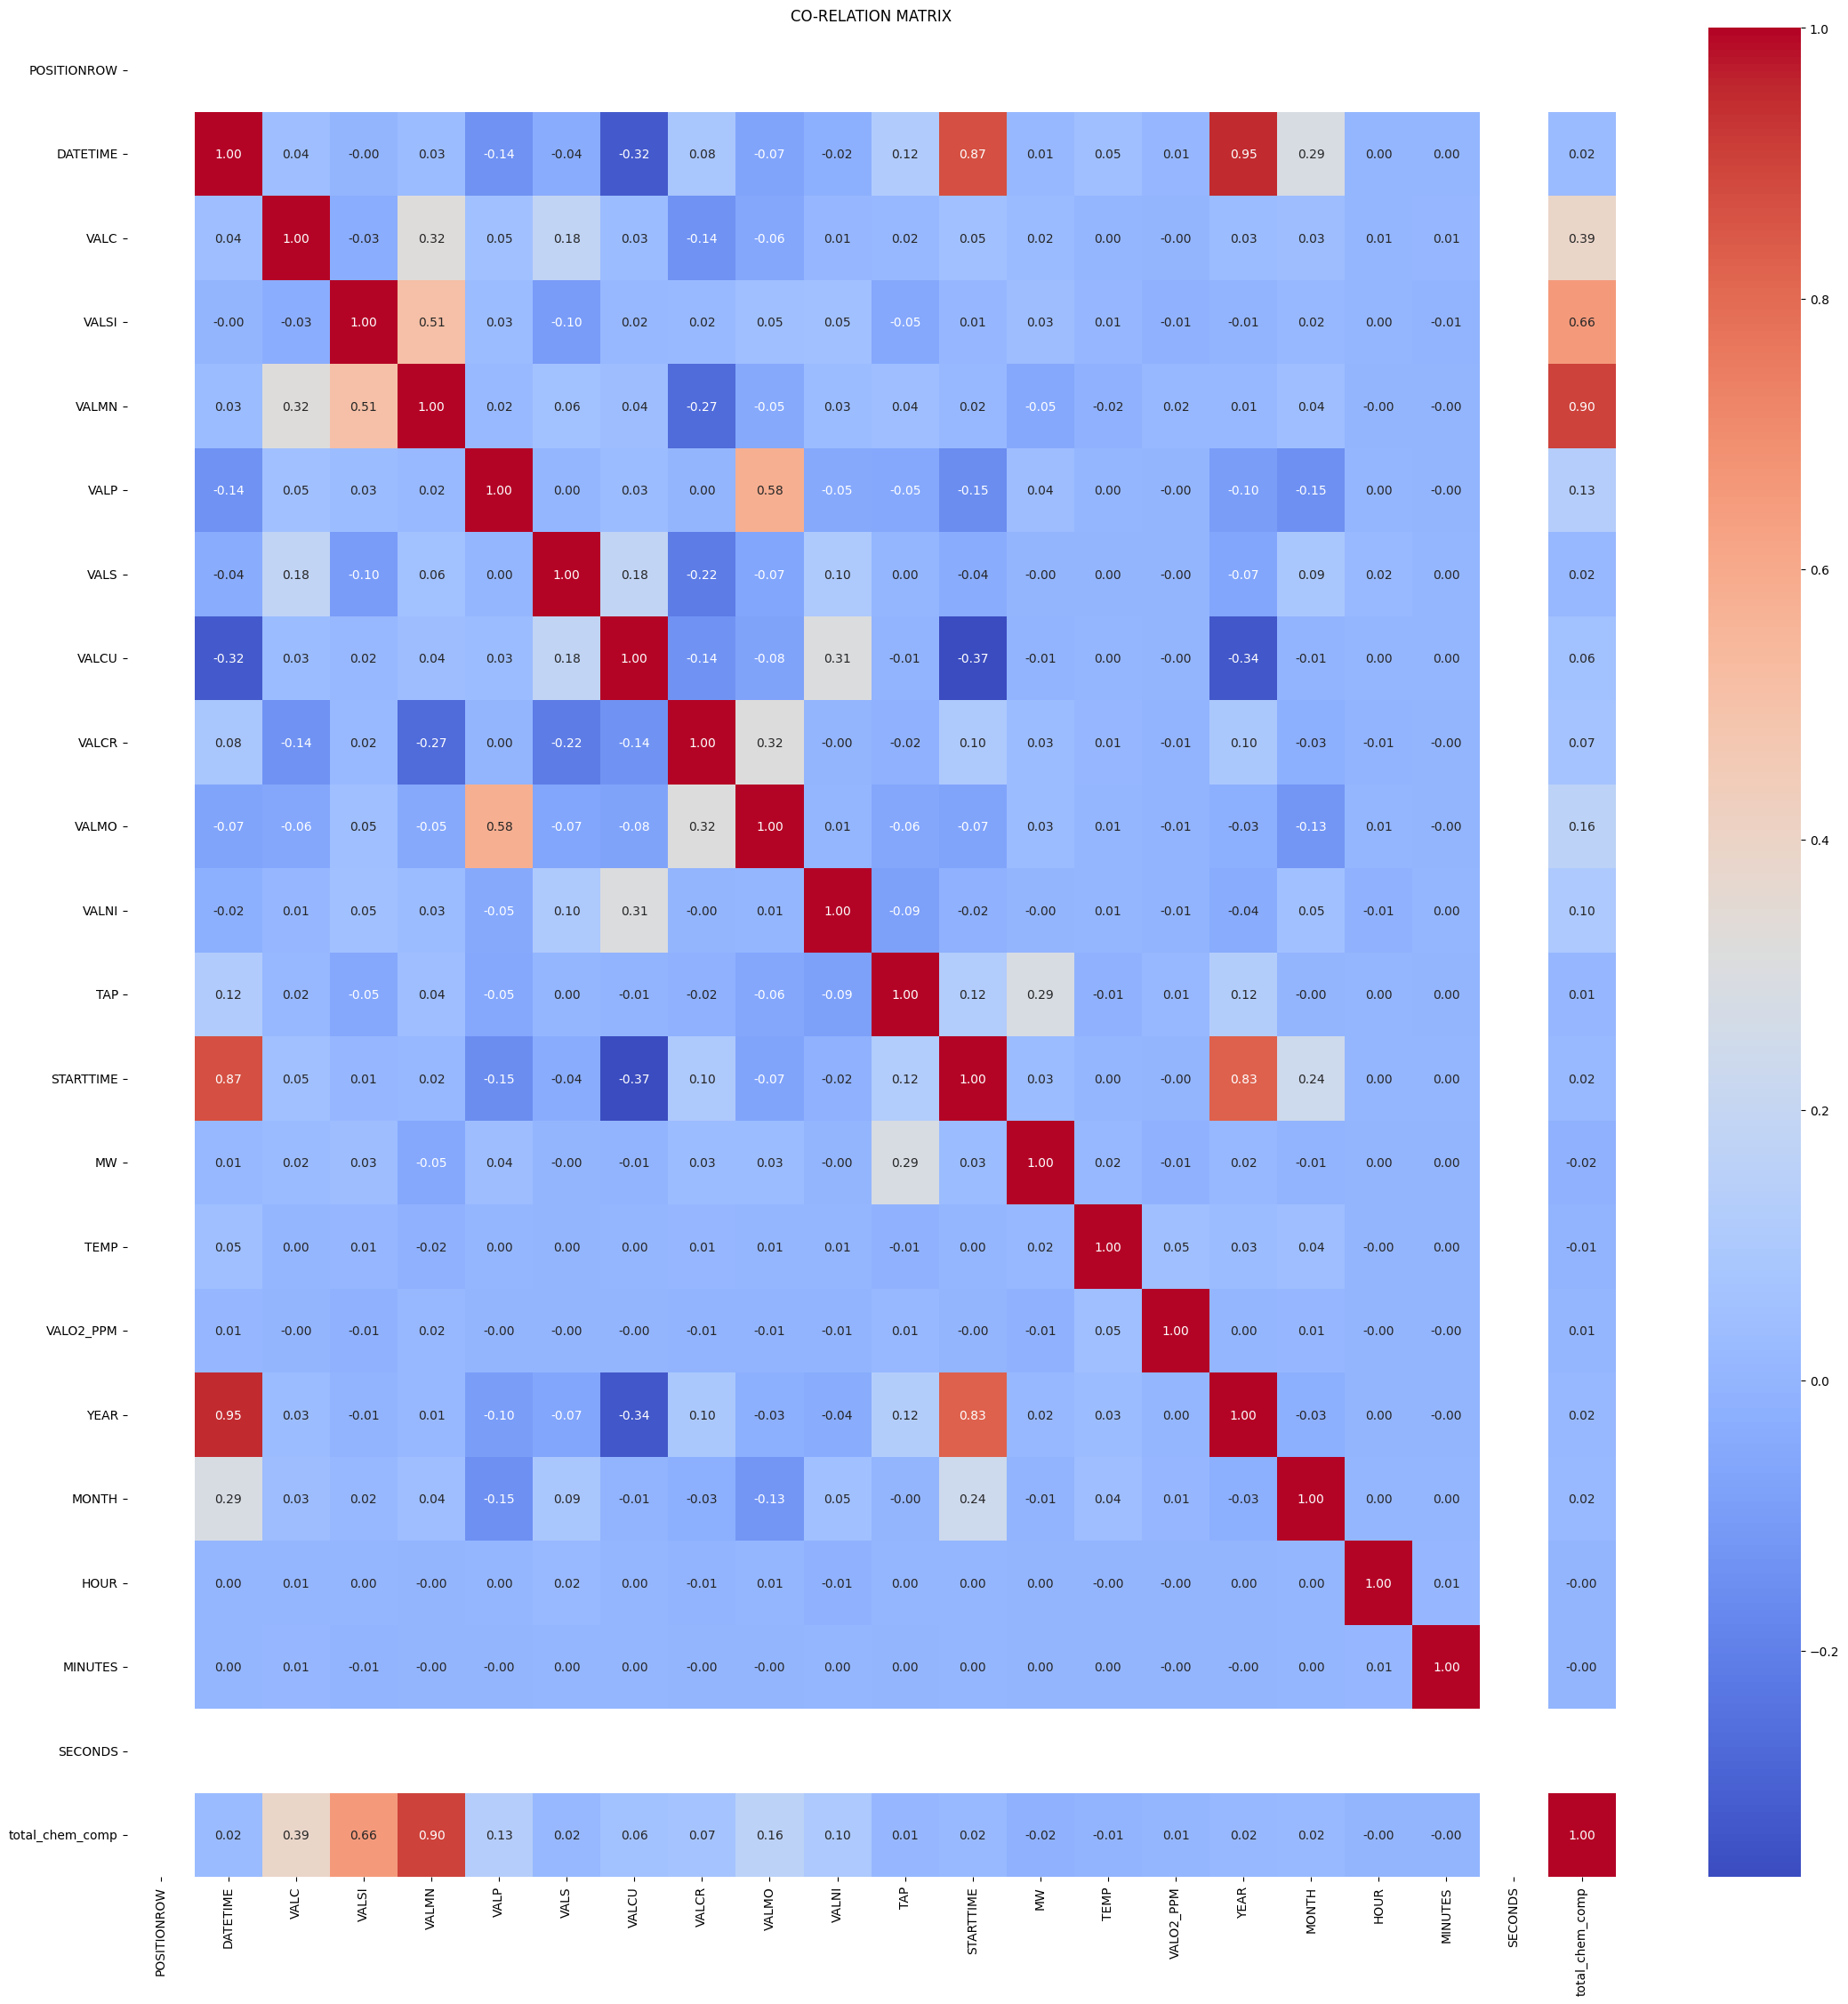

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(27, 27))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt =".2f")
plt.title("CO-RELATION MATRIX")
plt.show();

In [31]:
feature_cols = ['POSITIONROW', 'VALC', 'VALSI', 'VALMN', 'VALP', 'VALS', 'VALCU', 'VALCR', 'VALMO', 'VALNI', 'TAP', 'TEMP', 'VALO2_PPM', 'YEAR', 'MONTH', 'HOUR', 'MINUTES', 'SECONDS', "total_chem_comp"]

In [32]:
X = df_final[feature_cols]
y= df_final["MW"]

from sklearn.model_selection import train_test_split

X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val , y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)


len(X_train) , len(y_train), len(X_test), len(y_test)

(285464, 285464, 35683, 35683)

In [33]:
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)

In [34]:
y_train = np.array(y_train)

y_train = y_train.reshape(-1,1)
y_train.shape

(285464, 1)

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_ss = scaler.fit_transform(X_train)
y_train_ss = scaler.fit_transform(y_train)


In [36]:
import numpy as np

cols_with_inf_or_large_values = [col for col in X_train.columns if np.isinf(X_train[col]).any() or np.abs(X_train[col]).max() > np.finfo(np.float32).max]
print(cols_with_inf_or_large_values)

[]


In [37]:
for col in cols_with_inf_or_large_values:
    X_train[col] = X_train[col].replace([np.inf, -np.inf], np.nan)
    X_val[col] = X_val[col].replace([np.inf, -np.inf], np.nan)
    X_test[col] = X_test[col].replace([np.inf, -np.inf], np.nan)

In [38]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [39]:
df_final.to_csv("df_final1")

**RANDOM FOREST**

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score


numeric_transformer = SimpleImputer(strategy='mean')
rf_pipeline = Pipeline(steps=[('imputer', numeric_transformer), ('model', RandomForestRegressor(random_state=42))])

rf_pipeline.fit(X_train_scaled, y_train)


y_val_pred = rf_pipeline.predict(X_val_scaled)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)
print(f'Validation MSE: {val_mse:.3f}, Validation R^2: {val_r2:.3f}')

y_test_pred = rf_pipeline.predict(X_test_scaled)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f'Test MSE: {test_mse:.3f}, Test R^2: {test_r2:.3f}')

/opt/conda/lib/python3.10/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Validation MSE: 20.533, Validation R^2: 0.398
Test MSE: 25.475, Test R^2: 0.251


In [41]:
y_test_pred

array([ 0.1696875 ,  0.375     , 15.41077083, ...,  0.24679167,
        0.91617262,  0.375     ])

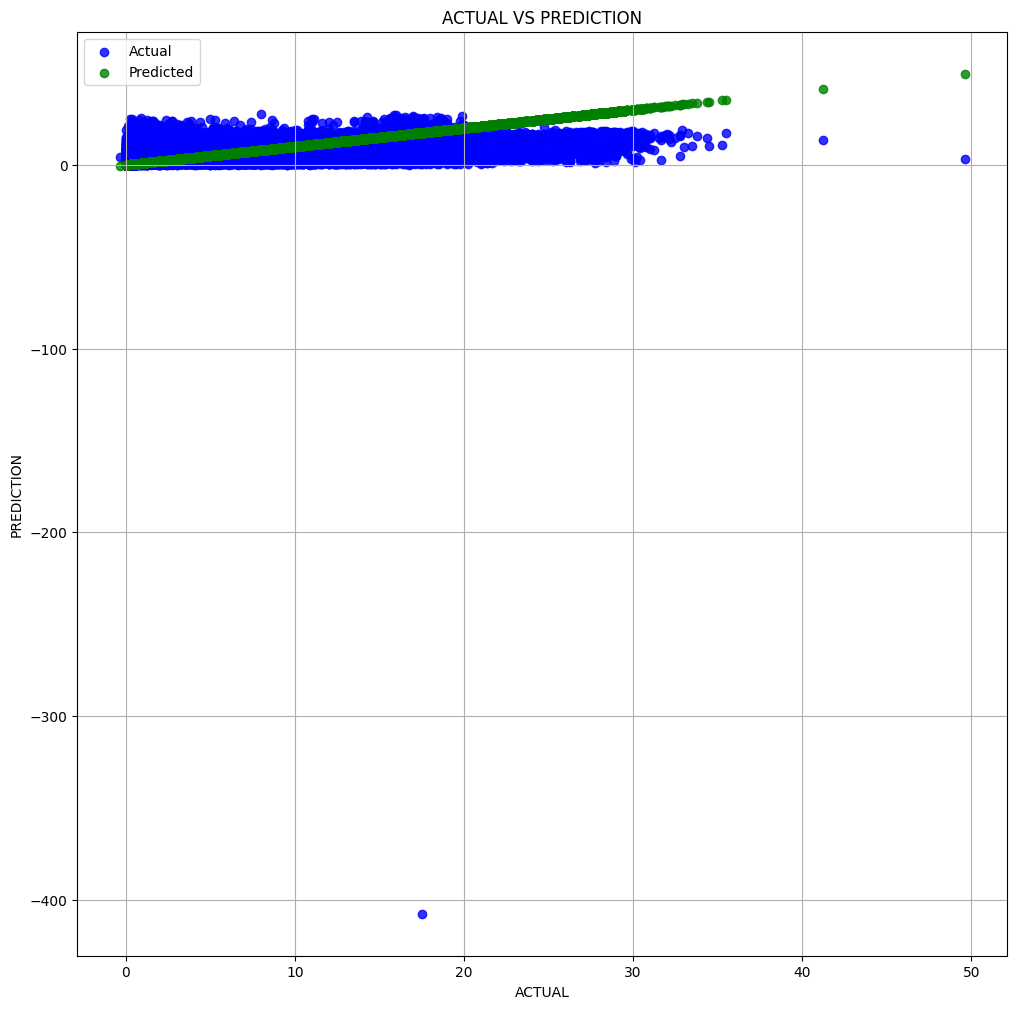

In [42]:
plt.figure(figsize=(12,12))
plt.scatter(y_test, y_test_pred, color="blue", label ="Actual", alpha=0.8)
#plt.plot([min(y_test)], [max(y_test)],[min(y_test_pred)], [max(y_test_pred)], color = "red", linestyle="--", label ="Prefect Prediction")
plt.scatter(y_test,y_test, color="green", label ="Predicted", alpha=0.8)
plt.title("ACTUAL VS PREDICTION")
plt.xlabel("ACTUAL")
plt.ylabel("PREDICTION")
plt.legend()
plt.grid(True)
plt.show()

In [43]:
from xgboost import XGBRegressor 

xgb_model = XGBRegressor(random_state=42)
xgb_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [44]:
xgb_model = xgb_model.fit(X_train_scaled, y_train)


y_val_pred = xgb_model.predict(X_val_scaled)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)
print(f"MSE:{val_mse:.3f} |  R2_Score :{val_r2:.3f}")
      
y_test_pred = xgb_model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f"TEST_MSE:{test_mse: .3f} | R2_SCORE :{test_r2:.3f}")

MSE:18.302 |  R2_Score :0.464
TEST_MSE: 23.572 | R2_SCORE :0.307
